In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
from config import weather_api_key

In [11]:
# Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to comfrim sufficient count.
len(cities)

598

In [12]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

thompson ca
punta arenas cl
hasaki jp
geraldton au
itoman jp
kahului us
sao filipe cv
qaanaaq gl
gillette us
ushuaia ar
kodra ua
severo-kurilsk ru
manokwari id
ternate id
busselton au
chuy uy
mys shmidta ru
geraldton ca
port alfred za
bosaso so
maragogi br
puerto ayora ec
saskylakh ru
taolanaro mg
punta arenas cl
tuktoyaktuk ca
abonnema ng
clyde river ca
tawkar sd
airai pw
castro cl
albany au
rikitea pf
nanortalik gl
aksha ru
ushuaia ar
yulara au
rikitea pf
ushuaia ar
buritizeiro br
alofi nu
rikitea pf
chingola zm
reo bf
atuona pf
kapaa us
demak id
bethel us
norman wells ca
torbay ca
wheeling us
egvekinot ru
aripuana br
ushuaia ar
yerofey pavlovich ru
saint anthony ca
dayong cn
saint george bm
illoqqortoormiut gl
inirida co
provideniya ru
bengkulu id
kruisfontein za
atuona pf
elliot za
jamestown sh
kailua us
samarai pg
barentsburg sj
rikitea pf
dhidhdhoo mv
rio grande br
qaanaaq gl
alofi nu
sault sainte marie ca
umm lajj sa
rikitea pf
naftah tn
sao filipe cv
drabiv ua
henties bay na
al

rach gia vn
thunder bay ca
dwarka in
husavik is
dikson ru
mataura pf
zhangye cn
vila franca do campo pt
bredasdorp za
yulara au
mahebourg mu
lavrentiya ru
najran sa
new norfolk au
airai pw
rikitea pf
tocopilla cl
chokurdakh ru
cidreira br
tasiilaq gl
hermanus za
magaria ne
saint george bm
rawson ar
punta arenas cl
leningradskiy ru
kavieng pg
cape town za
cherskiy ru
albany au
saint-philippe re
mar del plata ar
beirut lb
viligili mv
yako bf
punta arenas cl
dergachi ru
rikitea pf
sibi pk
uwayl sd
hamilton bm
hithadhoo mv
mapastepec mx
cape town za
hobart au
rikitea pf
ratnagiri in
bethel us
havoysund no
tarauaca br
jamestown sh
pangnirtung ca
narsaq gl
akdepe tm
praia da vitoria pt
cape town za
rikitea pf
rikitea pf
guerrero negro mx
mataura pf
rikitea pf
dubti et
norman wells ca
kefamenanu id
saint-augustin ca
beringovskiy ru
hermanus za
mys shmidta ru
ushuaia ar
havre-saint-pierre ca
ushuaia ar
mataura pf
hobart au
punta arenas cl
rikitea pf
bowen au
rikitea pf
srednekolymsk ru
atuona 

baruun-urt mn
meulaboh id
talnakh ru
butaritari ki
barrow us
bargal so
yelizovo ru
ahipara nz
vaini to
vikravandi in
helena us
yuzhno-yeniseyskiy ru
butaritari ki
cameta br
bluff nz
vestmannaeyjar is
bandarbeyla so
airai pw
buala sb
lagoa pt
huazolotitlan mx
ancud cl
castro cl
lebu cl
taolanaro mg
hamilton bm
muisne ec
rikitea pf
paignton gb
hermanus za
shimoda jp
albany au
mar del plata ar
punta arenas cl
sokolo ml
rikitea pf
katsuura jp
taolanaro mg
kadykchan ru
puerto ayora ec
ushuaia ar
cape town za
punta arenas cl
arraial do cabo br
rikitea pf
puerto ayora ec
nanortalik gl
lodwar ke
nouakchott mr
cayenne gf
rikitea pf
hobart au
karratha au
yellowknife ca
ushuaia ar
saint george bm
bluff nz
bathsheba bb
hithadhoo mv
tasiilaq gl
arkhangelsk ru
kodiak us
busselton au
hobart au
dingle ie
husavik is
caravelas br
natal br
butaritari ki
pochutla mx
kapaa us
methoni gr
ribeira grande pt
bambous virieux mu
gopalur in
hermanus za
busselton au
new norfolk au
kapaa us
tiksi ru
illoqqortoormiu

In [13]:
# Create an empty list to hold the weather data.
city_data = []

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

#create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | itoman
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | gillette
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kodra
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | manokwari
Processing Record 14 of Set 1 | ternate
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | bosaso
Processing Record 20 of Set 1 | maragogi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | saskylakh
Processing

Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 43 of Set 4 | stornoway
Processing Record 44 of Set 4 | dmanisi
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | sun city
Processing Record 47 of Set 4 | gumdag
Processing Record 48 of Set 4 | moree
Processing Record 49 of Set 4 | omboue
Processing Record 50 of Set 4 | palasbari
Processing Record 1 of Set 5 | beroroha
Processing Record 2 of Set 5 | hirara
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | takoradi
Processing Record 5 of Set 5 | carutapera
Processing Record 6 of Set 5 | hami
Processing Record 7 of Set 5 | xuddur
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | tacuarembo
Processing Record 10 of Set 5 | russell
Processing Record 11 of Set 5 | veraval
Processing Record 12 of Set 5 | borba
Processing Record

Processing Record 30 of Set 8 | rochegda
Processing Record 31 of Set 8 | syracuse
Processing Record 32 of Set 8 | kodiak
Processing Record 33 of Set 8 | blonduos
City not found. Skipping...
Processing Record 34 of Set 8 | sabla
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | caravelas
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | jazzin
City not found. Skipping...
Processing Record 39 of Set 8 | rundu
Processing Record 40 of Set 8 | camana
Processing Record 41 of Set 8 | shibetsu
Processing Record 42 of Set 8 | omsukchan
Processing Record 43 of Set 8 | tonantins
Processing Record 44 of Set 8 | caxito
Processing Record 45 of Set 8 | beloha
Processing Record 46 of Set 8 | berezna
Processing Record 47 of Set 8 | kerman
Processing Record 48 of Set 8 | la sarre
Processing Record 49 of Set 8 | pouso alegre
Processing Record 50 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 1 of Set 9 | tilichiki
Processing Record

Processing Record 16 of Set 12 | saint-denis
Processing Record 17 of Set 12 | easley
Processing Record 18 of Set 12 | izumo
Processing Record 19 of Set 12 | tautira
Processing Record 20 of Set 12 | prince george
Processing Record 21 of Set 12 | shimoda
Processing Record 22 of Set 12 | lufilufi
Processing Record 23 of Set 12 | koshurnikovo
Processing Record 24 of Set 12 | peniche
Processing Record 25 of Set 12 | baruun-urt
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | yelizovo
Processing Record 28 of Set 12 | vikravandi
Processing Record 29 of Set 12 | helena
Processing Record 30 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 31 of Set 12 | cameta
Processing Record 32 of Set 12 | vestmannaeyjar
Processing Record 33 of Set 12 | bandarbeyla
Processing Record 34 of Set 12 | huazolotitlan
City not found. Skipping...
Processing Record 35 of Set 12 | muisne
Processing Record 36 of Set 12 | paignton
Processing

In [14]:
len(city_data)

548

In [15]:
# Convert the array of dictinaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,21.20,53,90,21.85,CA,2021-04-13 06:17:35
1,Punta Arenas,-53.1500,-70.9167,42.80,75,40,20.71,CL,2021-04-13 06:17:35
2,Hasaki,35.7333,140.8333,66.00,68,75,11.50,JP,2021-04-13 06:17:35
3,Geraldton,-28.7667,114.6000,71.60,49,40,17.27,AU,2021-04-13 06:17:36
4,Itoman,26.1247,127.6694,78.01,83,75,9.22,JP,2021-04-13 06:17:36
5,Kahului,20.8947,-156.4700,71.60,78,1,8.05,US,2021-04-13 06:13:21
6,Sao Filipe,14.8961,-24.4956,76.15,63,77,8.97,CV,2021-04-13 06:17:37
7,Qaanaaq,77.4840,-69.3632,-6.29,85,63,5.32,GL,2021-04-13 06:17:37
8,Gillette,44.2911,-105.5022,27.00,68,75,14.97,US,2021-04-13 06:15:37
9,Ushuaia,-54.8000,-68.3000,46.40,57,75,14.97,AR,2021-04-13 06:17:37


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-04-13 06:17:35,55.7435,-97.8558,21.20,53,90,21.85
1,Punta Arenas,CL,2021-04-13 06:17:35,-53.1500,-70.9167,42.80,75,40,20.71
2,Hasaki,JP,2021-04-13 06:17:35,35.7333,140.8333,66.00,68,75,11.50
3,Geraldton,AU,2021-04-13 06:17:36,-28.7667,114.6000,71.60,49,40,17.27
4,Itoman,JP,2021-04-13 06:17:36,26.1247,127.6694,78.01,83,75,9.22
...,...,...,...,...,...,...,...,...,...
543,Methoni,GR,2021-04-13 06:20:48,36.8197,21.7049,60.01,62,75,2.82
544,Gopalur,IN,2021-04-13 06:20:49,16.6167,77.8000,93.36,30,67,5.35
545,Fayaoue,NC,2021-04-13 06:20:49,-20.6500,166.5333,77.59,81,97,3.27
546,Bairiki,KI,2021-04-13 06:20:49,1.3292,172.9752,82.40,78,40,4.61


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

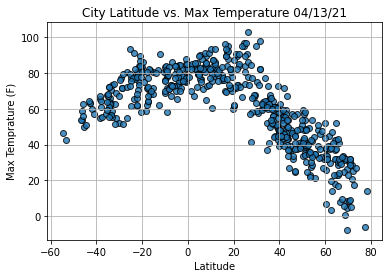

In [27]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

#Incorporate the otehr graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show Plot.
plt.show()

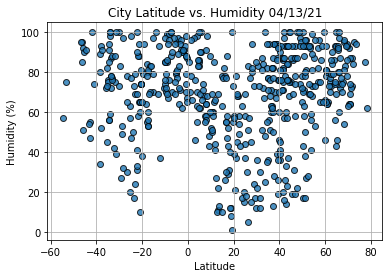

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

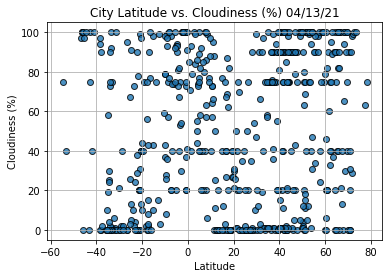

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

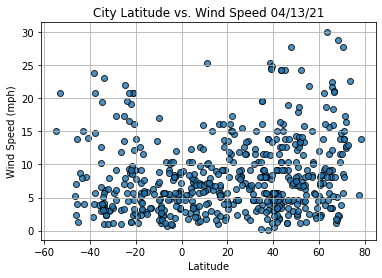

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()